In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline
#%matplotlib

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# matplotlib에는 텍스트를 서로 다른 색상으로 그리는 기능이 없습니다. 이를 구현해 보겠습니다.
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            # 텍스트를 생성하고 색상을 지정합니다.
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [4]:
# 플롯 폰트 패밀리를 Arial로 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 수학 텍스트 굵게 및 이탤릭체 폰트 패밀리를 Arial로 설정
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'NanumGothic:bold'
matplotlib.rcParams['mathtext.it'] = 'NanumGothic:italic'

Text(-86, -2.4, '데이터 출처: xyz; 설문 조사 응답자 수 포함. 참여자들은 최대 3개의 옵션을 선택할 수 있었습니다.')

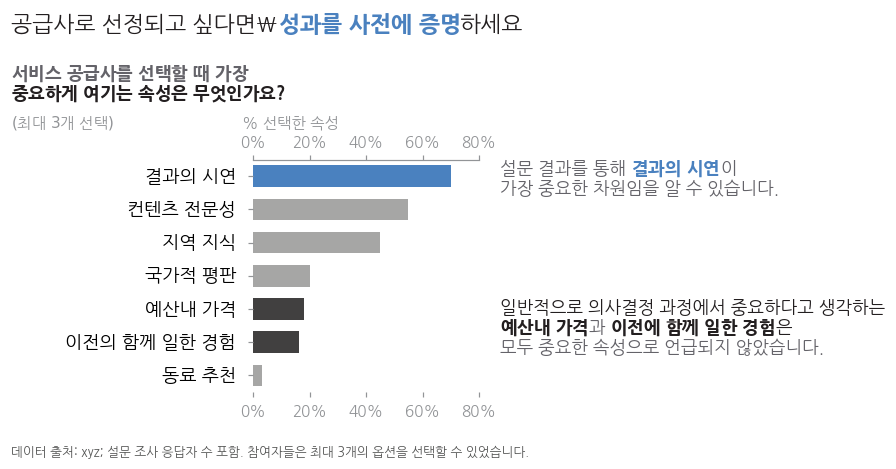

In [31]:
# 설문 응답
X = ['동료 추천', '이전의 함께 일한 경험', '예산내 가격', '국가적 평판', '지역 지식', '컨텐츠 전문성', '결과의 시연']
Y = [3, 16, 18, 20, 45, 55, 70]  # 응답 분포

# 새로운 그림 생성
fig, ax1 = plt.subplots(figsize=(8.2, 4.2),  # 가로, 세로 (인치 단위)
                        dpi=110)             # 그림 해상도

# 그림 레이아웃 조정
fig.subplots_adjust(left=0.28, right=0.53, top=0.61, bottom=0.107)

# 수평 막대 그래프 그리기
ax1.barh(range(len(X)),
         Y,
         height=0.65,
         color=[GRAY8] + [GRAY2]*2 + [GRAY8]*3 + [BLUE2])

# y축과 x축의 데이터 한계 설정
ax1.set_xlim([0, 80])
ax1.set_ylim([-0.5, 6.5])

# 축 객체의 속성 설정
plt.setp(ax1,
         xticks=[0, 20, 40, 60, 80],  # 5 개의 x-눈금: 0과 1
         xticklabels=['0%', '20%', '40%', '60%', '80%'],  # n% 라벨 포함
         yticks=np.arange(len(X)),  # 모든 응답에 대한 눈금
         yticklabels=X)  # 텍스트 라벨 포함

# 눈금, 눈금 레이블, 그리드 선의 모양 변경 
ax1.tick_params(top='on', bottom='off', left='off', 
                labelbottom='off', labeltop='on')

# x 눈금 레이블 모양 설정
for item in ax1.get_xticklabels():
    item.set_color(GRAY7)

# y 눈금 레이블 모양 설정
for item in ax1.get_yticklabels():
    item.set_fontsize(12)
    # y 눈금 레이블을 이동시키기 위해 변환 사용
    offset = transforms.ScaledTranslation(-0.06, 0.02, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# 차트 테두리 제거
ax1.tick_params(color=GRAY7)
ax1.spines['top'].set_color(GRAY7)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# 그래프 제목
rainbow_text(-86, 10.4,
             '공급사로 선정되고 싶다면||'
             '$\\bf{성과를\ 사전에\ 증명}$||하세요',
             [[GRAY4], [GRAY1, BLUE2, GRAY1]],
             spacing=25,
             ax=ax1,
             fontsize=14.7)
# 설문 질문
rainbow_text(-86, 8.35,
             '$\\bf{서비스\ 공급사를\ 선택할\ 때\ 가장}$\n'
             '$\\bf{중요하게\ 여기는\ 속성은\ 무엇인가요?}$',
             [[GRAY4], [GRAY1]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)
ax1.text(-86, 7.5, '$\\it{(최대\ 3개\ 선택)}$', color=GRAY7, fontsize=10)
ax1.text(-4, 7.5, '% 선택한 속성', color=GRAY7, fontsize=10)

# 설문 결과와 관련된 텍스트 노트
rainbow_text(87.6, 5.5,
             '설문 결과를 통해 ||$\\bf{결과의\ 시연}$||이\n'
             '가장 중요한 차원임을 알 수 있습니다.',
             [[GRAY4, BLUE2,GRAY4], [GRAY4, GRAY4]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)

# 초기 가설과 관련된 텍스트 노트
rainbow_text(87.6, 0.7,
             '일반적으로 의사결정 과정에서 중요하다고 생각하는\n'
             '$\\bf{예산내\ 가격}$||과 ||$\\bf{이전에\ 함께\ 일한\ 경험}$은\n'
             '모두 중요한 속성으로 언급되지 않았습니다.',
             [[GRAY1],[GRAY1, GRAY4, GRAY1],[GRAY4]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)

# 데이터 출처에 관한 각주
ax1.text(-86, -2.4,
         '데이터 출처: xyz; 설문 조사 응답자 수 포함. '
         '참여자들은 최대 3개의 옵션을 선택할 수 있었습니다.',
         fontsize=8.3,
         color=GRAY3)
